In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv("/Users/pilarlorenteconesa/Desktop/DEFINITIVOS/tweets_25_tendencias_variables_7h.csv", sep = ";")
#df.drop(df.columns[0], axis = 1, inplace = True)

In [16]:
df

,trend,start_lifetime,total_tweets,total_hashtags,total_mentions,total_reply_to,total_url,total_photo,total_retweets,total_likes,...,tweet_acc_45,tweet_acc_56,tweet_acc_67,user_count_01,user_count_12,user_count_23,user_count_34,user_count_45,user_count_56,user_count_67
0,#AndaLevantaM25,7,247,1151,279,309,63,140,1050.0,3877.0,...,-26,62,52,13,20,36,44,25,44,122
1,#Aruseros316,9,6,6,7,6,6,1,4.0,7.0,...,1,0,-1,0,1,1,1,2,3,3
2,#CafeConGoles,10,1588,1682,1687,2918,76,124,2152.0,8423.0,...,30,-153,24,1,324,572,522,510,385,247
3,#ComparteTuAmanecer,8,101,265,171,209,2,32,444.0,616.0,...,7,6,61,0,0,0,0,7,16,33
4,#Coronavirius,10,165,279,180,183,6,113,449.0,2004.0,...,72,-108,-79,4,10,10,13,37,32,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Villar de Cañas,13,48,48,49,80,1,3,1.0,2.0,...,-5,-28,3,1,2,6,20,27,14,4
126,Violetta,15,130,181,130,130,0,27,301.0,2057.0,...,1,103,-80,0,1,2,1,1,94,114
127,World Press Photo 2020,16,51,57,52,55,35,5,553.0,813.0,...,1,28,-6,0,1,1,0,0,28,49
128,Ylenia,17,80,110,94,92,1,13,368.0,3096.0,...,-3,2,38,5,9,9,11,11,14,51


In [17]:
#Solo variables de tiempo
df_t = df.iloc[:, 12:]

In [18]:
df_t.columns

Index(['tweet_count_01', 'tweet_count_12', 'tweet_count_23', 'tweet_count_34',
       'tweet_count_45', 'tweet_count_56', 'tweet_count_67', 'tweet_vel_01',
       'tweet_vel_12', 'tweet_vel_23', 'tweet_vel_34', 'tweet_vel_45',
       'tweet_vel_56', 'tweet_vel_67', 'tweet_acc_01', 'tweet_acc_12',
       'tweet_acc_23', 'tweet_acc_34', 'tweet_acc_45', 'tweet_acc_56',
       'tweet_acc_67', 'user_count_01', 'user_count_12', 'user_count_23',
       'user_count_34', 'user_count_45', 'user_count_56', 'user_count_67'],
      dtype='object')

In [19]:
#tweet count
df_tc = df_t.iloc[:, 0:7]
df_tc.columns

Index(['tweet_count_01', 'tweet_count_12', 'tweet_count_23', 'tweet_count_34',
       'tweet_count_45', 'tweet_count_56', 'tweet_count_67'],
      dtype='object')

In [20]:
#user count
df_uc = df_t.iloc[:, 21:28]
df_uc.columns

Index(['user_count_01', 'user_count_12', 'user_count_23', 'user_count_34',
       'user_count_45', 'user_count_56', 'user_count_67'],
      dtype='object')

In [21]:
#vel
df_v = df_t.iloc[:, 7:14]
df_v.columns

Index(['tweet_vel_01', 'tweet_vel_12', 'tweet_vel_23', 'tweet_vel_34',
       'tweet_vel_45', 'tweet_vel_56', 'tweet_vel_67'],
      dtype='object')

In [22]:
#acc
df_a = df_t.iloc[:, 14:21]
df_a.columns

Index(['tweet_acc_01', 'tweet_acc_12', 'tweet_acc_23', 'tweet_acc_34',
       'tweet_acc_45', 'tweet_acc_56', 'tweet_acc_67'],
      dtype='object')

# GRÁFICOS: VARIABLES TEMPORALES 

In [23]:
# Initialize the figure
plt.style.use("seaborn-darkgrid")
# create a color palette
palette = plt.get_cmap("Set1")

In [24]:
df_t.T

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
tweet_count_01,13,0,1,0,4,60,4,215,0,0,...,16,0,5,0,0,1,0,0,5,43
tweet_count_12,22,1,381,0,10,92,7,418,0,0,...,41,2,12,0,0,2,1,1,9,88
tweet_count_23,40,1,655,0,14,55,4,361,0,0,...,61,3,11,0,0,6,2,1,9,93
tweet_count_34,47,1,619,0,35,40,1,291,0,0,...,82,2,10,0,27,23,1,0,12,90
tweet_count_45,28,2,613,7,128,32,3,205,0,0,...,94,2,14,0,41,35,1,0,12,107
tweet_count_56,71,3,454,20,113,32,12,145,6,0,...,105,3,52,0,23,19,104,28,14,157
tweet_count_67,166,3,319,94,19,92,39,167,26,103,...,104,26,80,23,14,6,127,50,54,242
tweet_vel_01,13,0,1,0,4,60,4,215,0,0,...,16,0,5,0,0,1,0,0,5,43
tweet_vel_12,9,1,380,0,6,32,3,203,0,0,...,25,2,7,0,0,1,1,1,4,45
tweet_vel_23,18,0,274,0,4,-37,-3,-57,0,0,...,20,1,-1,0,0,4,1,0,0,5


Las variables user count y tweet count nos determinan cuántos tweets hay sobre la tendencia en las seis horas antes y los usuarios únicos que tuitean al respecto.

Text(0.5, 1.02, 'TWEET COUNT & USER COUNT PER HOUR\nTrends from 0 to 15')

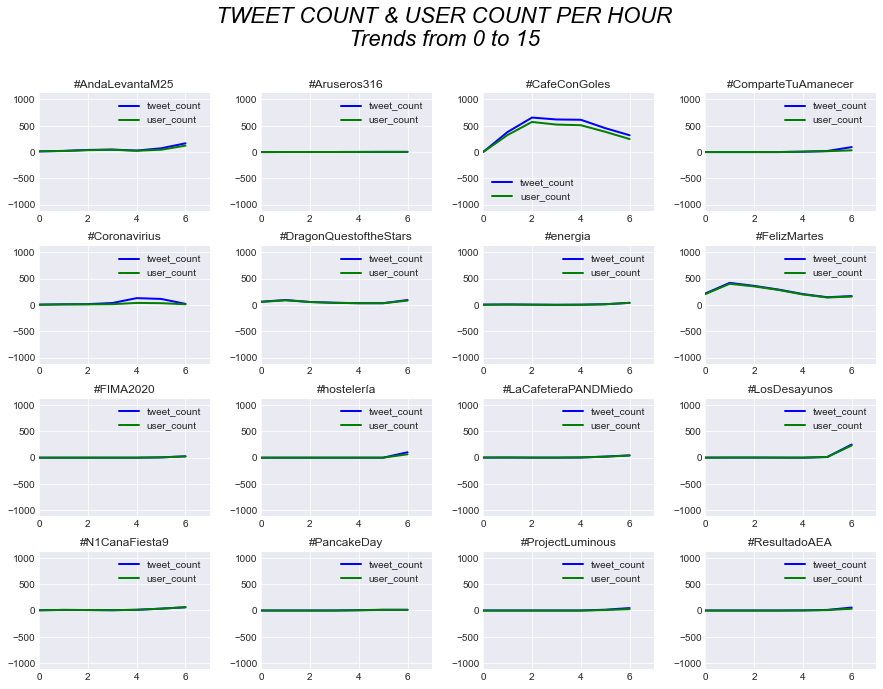

In [25]:
# multiple line plot
plt.subplots(figsize = (15, 10))
plt.subplots_adjust(left = 0.125, right = 0.9, bottom = 0.1, top = 0.9, wspace = 0.3, hspace = 0.3)
num = 0
for column in df_t.T.iloc[0:7, 0:16]:
    num += 1
    #Find the right spot on the plot
    plt.subplot(4, 4, num)
 # Plot the lineplot and title
    plt.plot(range(7), df_t.T.iloc[0:7, column], marker = "", linewidth = 2, alpha = 1, label = column, color="blue") #tweet_count
    plt.plot(range(7), df_t.T.iloc[21:28, column], marker = "", linewidth = 2, alpha = 1, label = column, color="green") #user_count

    plt.legend(["tweet_count", "user_count"])
    plt.title(df.trend[num - 1])
    #same limits
    plt.xlim(0, 7)
    plt.ylim(-max(df.total_tweets)//4, max(df.total_tweets)//4)

#General title
plt.suptitle("TWEET COUNT & USER COUNT PER HOUR\nTrends from 0 to 15", fontsize = 22, fontweight = 0,
             color = "black", style = "italic", y = 1.02)


Velicidad y aceleración.

Text(0.5, 1.02, 'VEC & ACC PER HOUR\nTrends from 0 to 15')

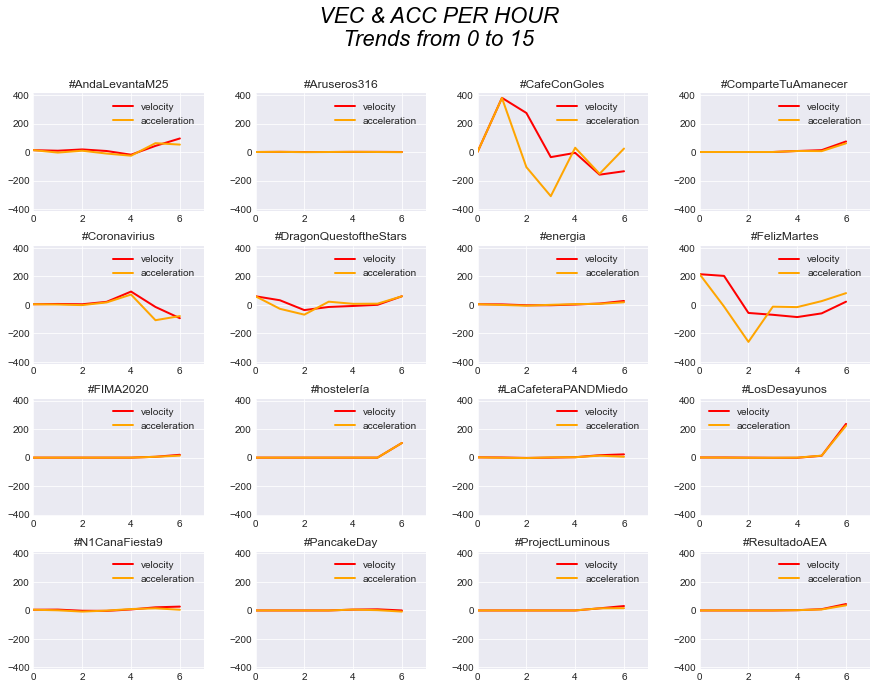

In [28]:
plt.subplots(figsize = (15, 10))
plt.subplots_adjust(left = 0.125, right = 0.9, bottom = 0.1, top = 0.9, wspace = 0.3, hspace = 0.3)
num = 0
for column in df_t.T.iloc[0:7, 0:16]:
    num += 1
    #Find the right spot on the plot
    plt.subplot(4, 4, num)
 # Plot the lineplot and title
    #plt.plot(range(24), df_t.T.iloc[0:24, column], marker = "", linewidth = 2, alpha = 1, label = column, color = "blue")
    plt.plot(range(7), df_t.T.iloc[7:14, column], marker = "", linewidth = 2, alpha = 1, label = column, color = "red") #velocity
    plt.plot(range(7), df_t.T.iloc[14:21, column], marker = "", linewidth = 2, alpha = 1, label = column, color = "orange") #acceleration
    plt.legend(["velocity", "acceleration"])
    plt.title(df.trend[num -1])
    #same limits
    plt.xlim(0, 7)
    plt.ylim((-max(df_t.iloc[:, 7:14].sum()))//10, (max(df_t.iloc[:, 7:14].sum()))//10)

#General title
plt.suptitle("VEC & ACC PER HOUR\nTrends from 0 to 15", fontsize = 22, fontweight = 0,
             color = "black", style = "italic", y = 1.02)

Text(0.5, 1.02, 'TWEET COUNT & USER COUNT PER HOUR\nTrends from 16 to 31')

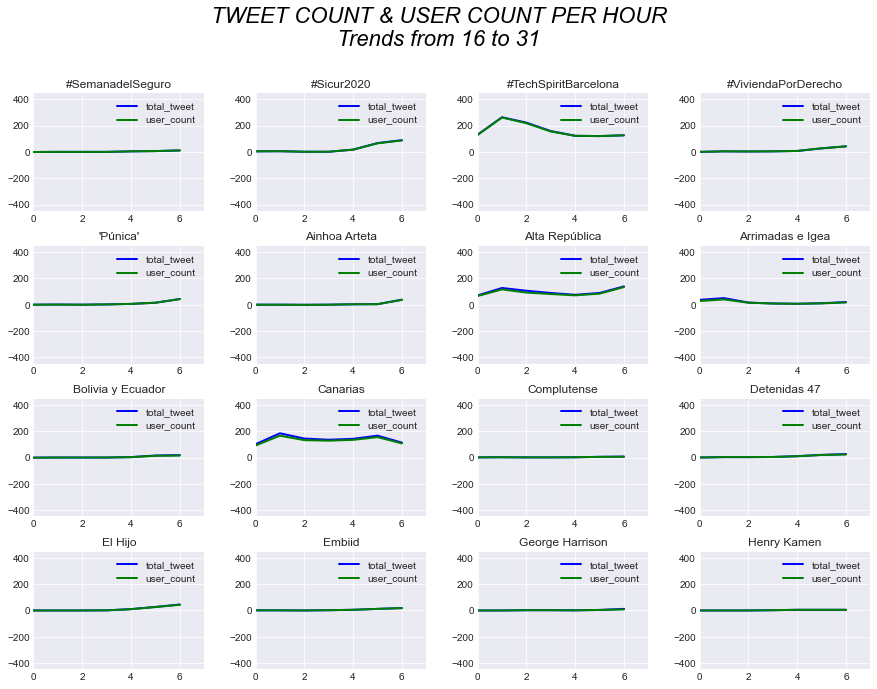

In [29]:
# multiple line plot
plt.subplots(figsize = (15, 10))
plt.subplots_adjust(left = 0.125, right = 0.9, bottom = 0.1, top = 0.9, wspace = 0.3, hspace = 0.3)
num = 0
for column in df_t.T.iloc[0:7, 16:32]:
    num += 1
    #Find the right spot on the plot
    plt.subplot(4, 4, num)
 # Plot the lineplot and title
    plt.plot(range(7), df_t.T.iloc[0:7, column], marker = "", linewidth = 2, alpha = 1, label = column, color="blue") #tweet_count
    plt.plot(range(7), df_t.T.iloc[21:28, column], marker = "", linewidth = 2, alpha = 1, label = column, color="green") #user_count

    plt.legend(["total_tweet", "user_count"])
    plt.title(df.trend[num +15])
    #same limits
    plt.xlim(0, 7)
    plt.ylim(-max(df.total_tweets)//10, max(df.total_tweets)//10)

#General title
plt.suptitle("TWEET COUNT & USER COUNT PER HOUR\nTrends from 16 to 31", fontsize = 22, fontweight = 0,
             color = "black", style = "italic", y = 1.02)


Text(0.5, 1.02, 'VEC & ACC PER HOUR\nTrends from 16 to 31')

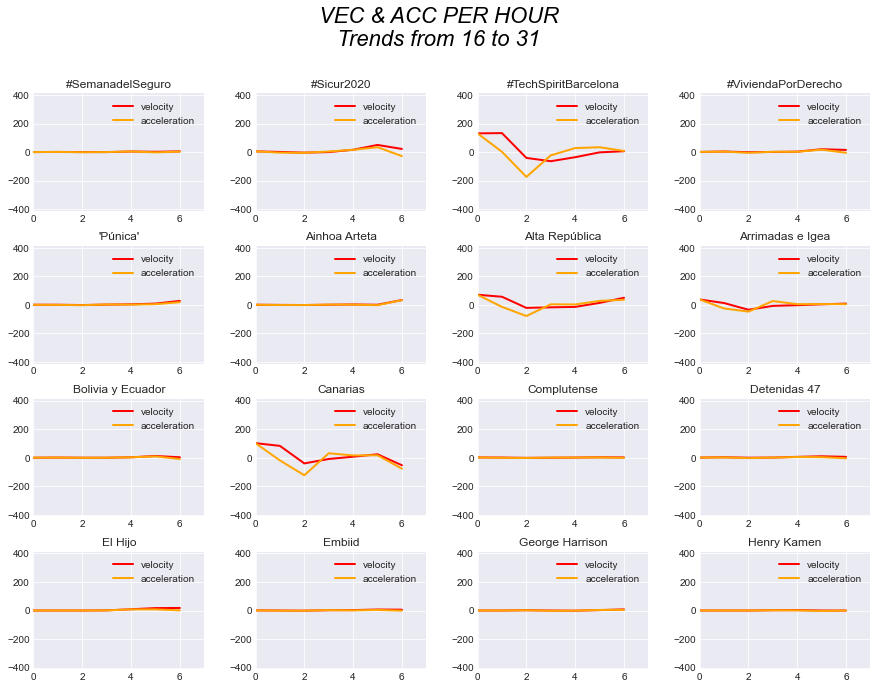

In [30]:
plt.subplots(figsize = (15, 10))
plt.subplots_adjust(left = 0.125, right = 0.9, bottom = 0.1, top = 0.9, wspace = 0.3, hspace = 0.3)
num = 0
for column in df_t.T.iloc[0:7, 16:32]:
    num += 1
    #Find the right spot on the plot
    plt.subplot(4, 4, num)
 # Plot the lineplot and title
    #plt.plot(range(24), df_t.T.iloc[0:24, column], marker = "", linewidth = 2, alpha = 1, label = column, color = "blue")
    plt.plot(range(7), df_t.T.iloc[7:14, column], marker = "", linewidth = 2, alpha = 1, label = column, color = "red") #velocity
    plt.plot(range(7), df_t.T.iloc[14:21, column], marker = "", linewidth = 2, alpha = 1, label = column, color = "orange") #acceleration
    plt.legend(["velocity", "acceleration"])
    plt.title(df.trend[num +15])
    #same limits
    plt.xlim(0, 7)
    plt.ylim(-(max(df_t.iloc[:, 7:14].sum())//10), (max(df_t.iloc[:, 7:14].sum())//10))

#General title
plt.suptitle("VEC & ACC PER HOUR\nTrends from 16 to 31", fontsize = 22, fontweight = 0,
             color = "black", style = "italic", y = 1.02)

Text(0.5, 1.02, 'TWEET COUNT & USER COUNT PER HOUR\nTrends from 32 to 47')

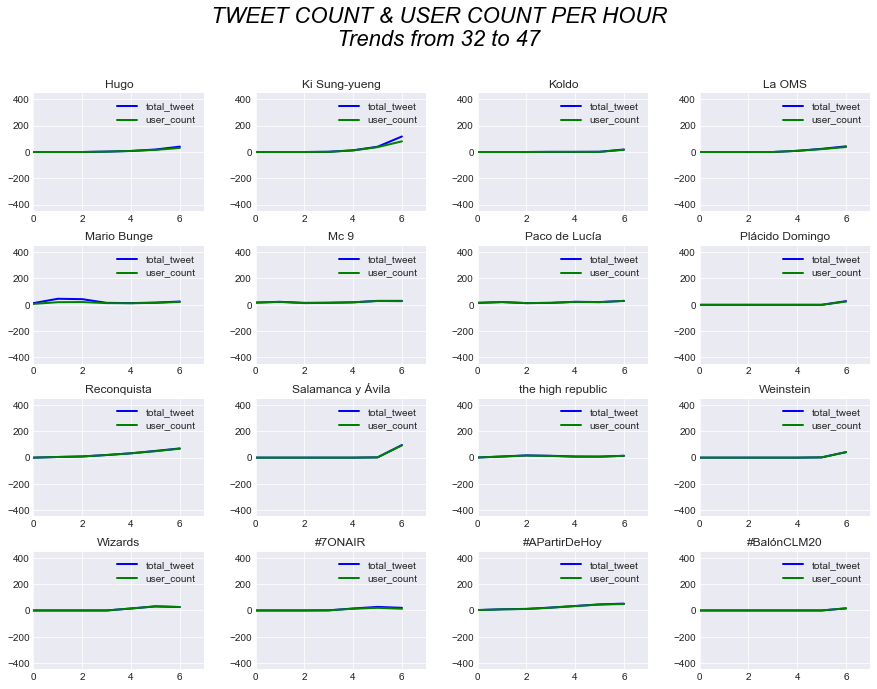

In [31]:
# multiple line plot
plt.subplots(figsize = (15, 10))
plt.subplots_adjust(left = 0.125, right = 0.9, bottom = 0.1, top = 0.9, wspace = 0.3, hspace = 0.3)
num = 0
for column in df_t.T.iloc[0:7, 32:48]:
    num += 1
    #Find the right spot on the plot
    plt.subplot(4, 4, num)
 # Plot the lineplot and title
    plt.plot(range(7), df_t.T.iloc[0:7, column], marker = "", linewidth = 2, alpha = 1, label = column, color="blue") #tweet_count
    plt.plot(range(7), df_t.T.iloc[21:28, column], marker = "", linewidth = 2, alpha = 1, label = column, color="green") #user_count

    plt.legend(["total_tweet", "user_count"])
    plt.title(df.trend[num +31])
    #same limits
    plt.xlim(0, 7)
    plt.ylim(-max(df.total_tweets)//10, max(df.total_tweets)//10)

#General title
plt.suptitle("TWEET COUNT & USER COUNT PER HOUR\nTrends from 32 to 47", fontsize = 22, fontweight = 0,
             color = "black", style = "italic", y = 1.02)


Text(0.5, 1.02, 'VEC & ACC PER HOUR\nTrends from 32 to 47')

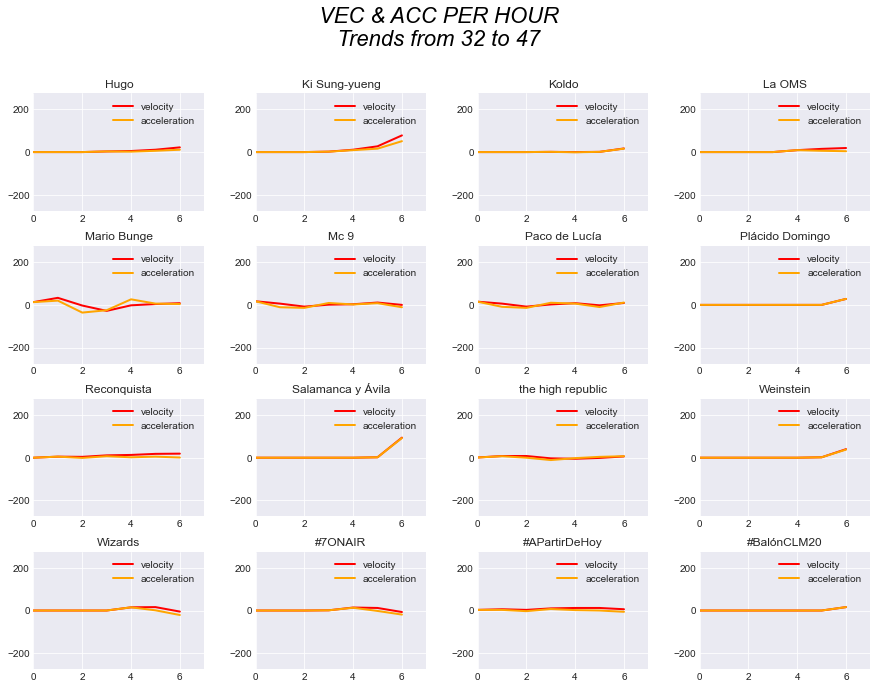

In [32]:
plt.subplots(figsize = (15, 10))
plt.subplots_adjust(left = 0.125, right = 0.9, bottom = 0.1, top = 0.9, wspace = 0.3, hspace = 0.3)
num = 0
for column in df_t.T.iloc[0:7, 32:48]:
    num += 1
    #Find the right spot on the plot
    plt.subplot(4, 4, num)
 # Plot the lineplot and title
    #plt.plot(range(24), df_t.T.iloc[0:24, column], marker = "", linewidth = 2, alpha = 1, label = column, color = "blue")
    plt.plot(range(7), df_t.T.iloc[7:14, column], marker = "", linewidth = 2, alpha = 1, label = column, color = "red") #velocity
    plt.plot(range(7), df_t.T.iloc[14:21, column], marker = "", linewidth = 2, alpha = 1, label = column, color = "orange") #acceleration
    plt.legend(["velocity", "acceleration"])
    plt.title(df.trend[num +31])
    #same limits
    plt.xlim(0, 7)
    plt.ylim(-(max(df_t.iloc[:, 7:14].sum())//15), (max(df_t.iloc[:, 7:14].sum())//15))

#General title
plt.suptitle("VEC & ACC PER HOUR\nTrends from 32 to 47", fontsize = 22, fontweight = 0,
             color = "black", style = "italic", y = 1.02)

[Text(0, 0, '#AndaLevantaM25'),
 Text(0, 0, '#Aruseros316'),
 Text(0, 0, '#CafeConGoles'),
 Text(0, 0, '#ComparteTuAmanecer'),
 Text(0, 0, '#Coronavirius'),
 Text(0, 0, '#DragonQuestoftheStars'),
 Text(0, 0, '#energia'),
 Text(0, 0, '#FelizMartes'),
 Text(0, 0, '#FIMA2020'),
 Text(0, 0, '#hostelería'),
 Text(0, 0, '#LaCafeteraPANDMiedo'),
 Text(0, 0, '#LosDesayunos'),
 Text(0, 0, '#N1CanaFiesta9'),
 Text(0, 0, '#PancakeDay'),
 Text(0, 0, '#ProjectLuminous'),
 Text(0, 0, '#ResultadoAEA'),
 Text(0, 0, '#SemanadelSeguro'),
 Text(0, 0, '#Sicur2020'),
 Text(0, 0, '#TechSpiritBarcelona'),
 Text(0, 0, '#ViviendaPorDerecho'),
 Text(0, 0, "'Púnica'"),
 Text(0, 0, 'Ainhoa Arteta'),
 Text(0, 0, 'Alta República'),
 Text(0, 0, 'Arrimadas e Igea'),
 Text(0, 0, 'Bolivia y Ecuador'),
 Text(0, 0, 'Canarias'),
 Text(0, 0, 'Complutense'),
 Text(0, 0, 'Detenidas 47'),
 Text(0, 0, 'El Hijo'),
 Text(0, 0, 'Embiid'),
 Text(0, 0, 'George Harrison'),
 Text(0, 0, 'Henry Kamen'),
 Text(0, 0, 'Hugo'),
 Text(0, 0,

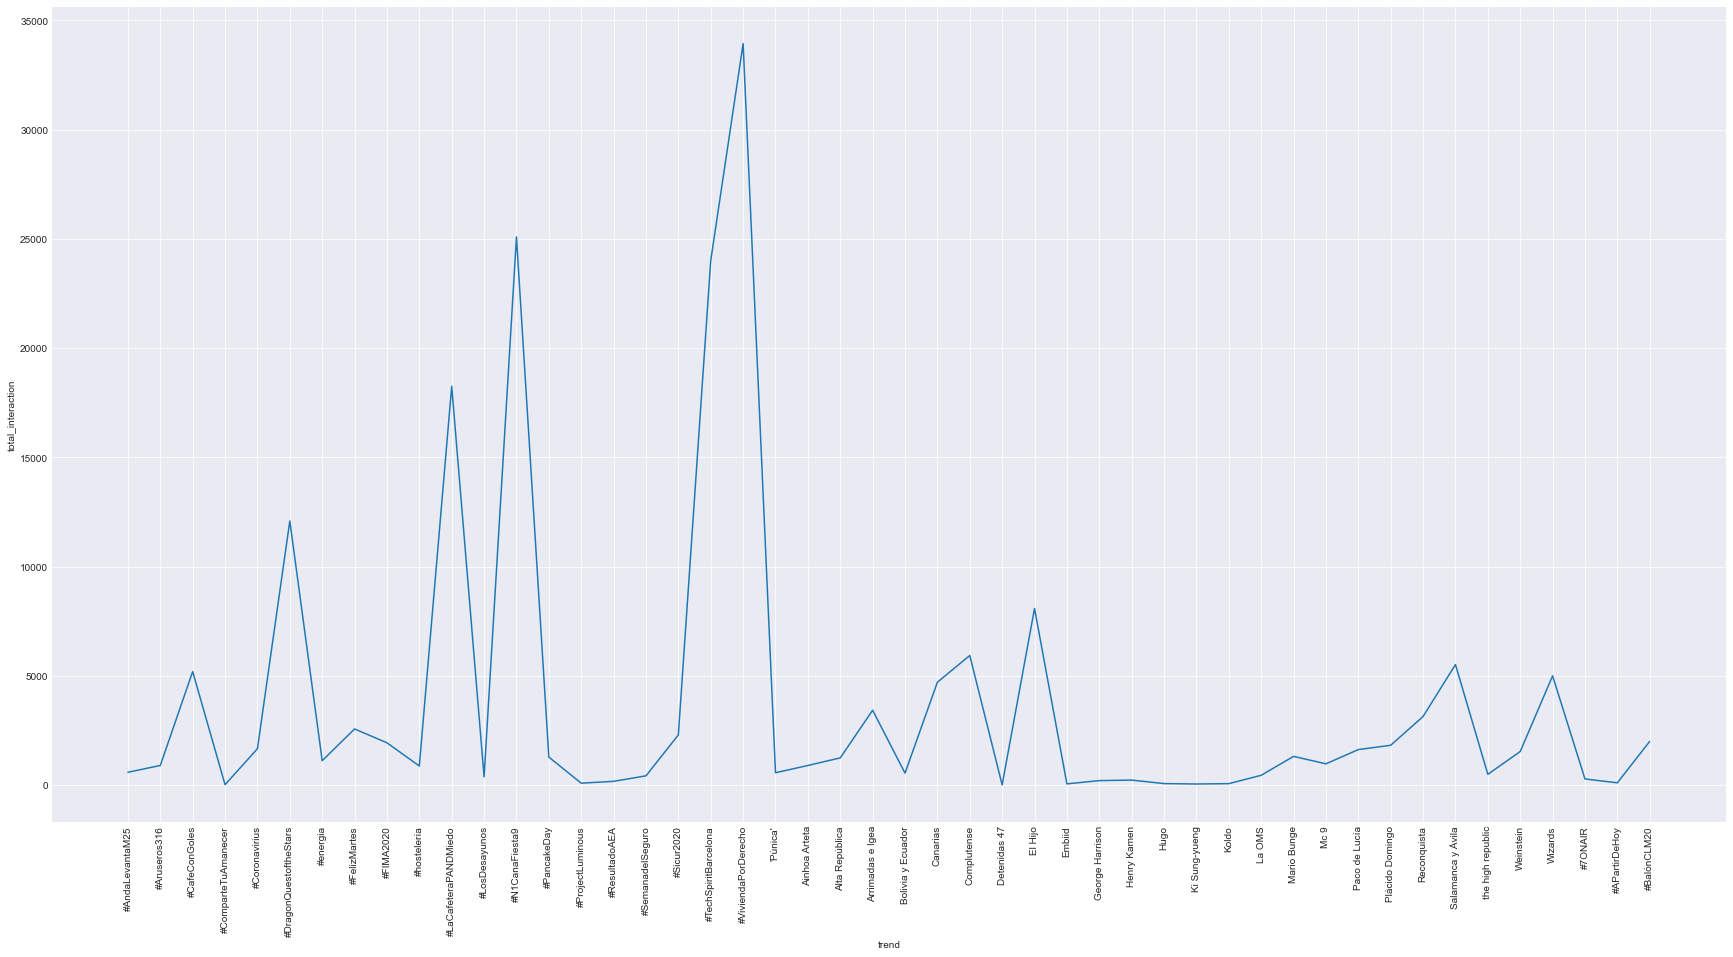

In [33]:
plt.subplots(figsize = (30, 15))
g = sns.lineplot(df.trend, df.total_interaction[0:48])
g.set_xticklabels(df.trend[:],rotation = 90)

# CLUSTERING

**KMEANS**

In [34]:
from sklearn.cluster import KMeans 
from scipy.spatial.distance import cdist 

In [35]:
X = df.iloc[:, 1:].values

In [36]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)
X.shape

(130, 39)

INERCIAS

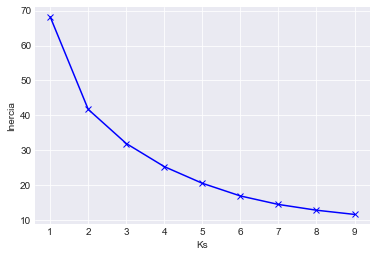

In [37]:
inercias = [] 
for k in range(1, 10): 
    kmeans = KMeans(k)
    kmeans.fit(X)     
    inercias.append(kmeans.inertia_) 
inercias
plt.plot(range(1, 10), inercias, "bx-") 
plt.xlabel("Ks") 
plt.ylabel("Inercia") 
plt.show() #buscar el codo, es decir, donde varía la inercia

In [38]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
kmeans.labels_

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
      dtype=int32)

In [39]:
df.sort_values("total_tweets", ascending = False)

,trend,start_lifetime,total_tweets,total_hashtags,total_mentions,total_reply_to,total_url,total_photo,total_retweets,total_likes,...,tweet_acc_45,tweet_acc_56,tweet_acc_67,user_count_01,user_count_12,user_count_23,user_count_34,user_count_45,user_count_56,user_count_67
107,La PAH,14,4466,4825,4502,6199,314,243,16416.0,52158.0,...,-88,100,-219,335,711,915,1085,1216,1411,1394
2,#CafeConGoles,10,1588,1682,1687,2918,76,124,2152.0,8423.0,...,30,-153,24,1,324,572,522,510,385,247
7,#FelizMartes,6,948,1333,991,1172,452,180,5569.0,11807.0,...,-16,26,82,204,400,351,283,198,140,158
111,Murga,14,833,997,947,2653,40,61,2344.0,11259.0,...,308,-199,-306,25,66,70,68,259,352,221
96,el holocausto,18,653,759,722,806,301,77,9905.0,22658.0,...,-6,130,-60,17,50,85,112,134,285,376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,George Harrison,10,15,40,32,28,0,8,29.0,19.0,...,-1,4,5,0,0,2,2,1,4,8
26,Complutense,8,15,17,15,15,0,11,7.0,38.0,...,1,2,-1,2,3,2,2,3,6,7
117,puerto real,15,12,33,28,33,2,7,41.0,88.0,...,-1,-1,11,1,1,0,1,1,0,6
31,Henry Kamen,7,10,22,10,10,7,3,13.0,48.0,...,1,-3,0,0,0,0,2,5,5,5


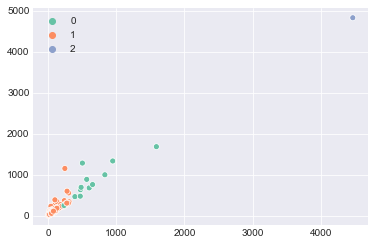

In [41]:
sns.scatterplot(df["total_tweets"].values, df["total_hashtags"].values, hue = kmeans.labels_, palette = "Set2")
plt.show()

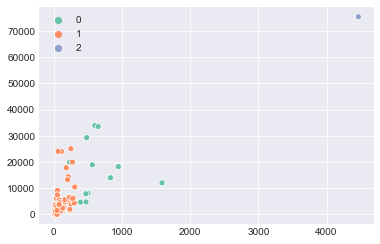

In [42]:
sns.scatterplot(df["total_tweets"].values, df["total_interaction"].values, hue = kmeans.labels_, palette = "Set2")
plt.show()

**HIERARCHICAL**
AGGLOMERATIVE

In [43]:
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics.cluster import homogeneity_score

In [44]:
linkage = ["ward", "complete", "average", "single"]
for link in linkage:
    agglom = AgglomerativeClustering(n_clusters = 3, linkage = link)
    agglom.fit(X)
    print("Linkage tipo", link)
    print(agglom.labels_)
    print("****")
    print(homogeneity_score(agglom.labels_, kmeans.labels_))
    print("*****")

Linkage tipo ward
[0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
****
0.7239396532774529
*****
Linkage tipo complete
[2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
****
0.6658678226588683
*****
Linkage tipo average
[0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
****
0.7063013760260983
*****
Linkage tipo single
[0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0

**HIERARCHICAL**
DENDROGRAMA

In [45]:
from scipy.spatial import distance_matrix 
from scipy.cluster import hierarchy 
import pylab

In [46]:
dist_matrix = distance_matrix(X,X)

<ipython-input-47-7059c234ef07>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, l)


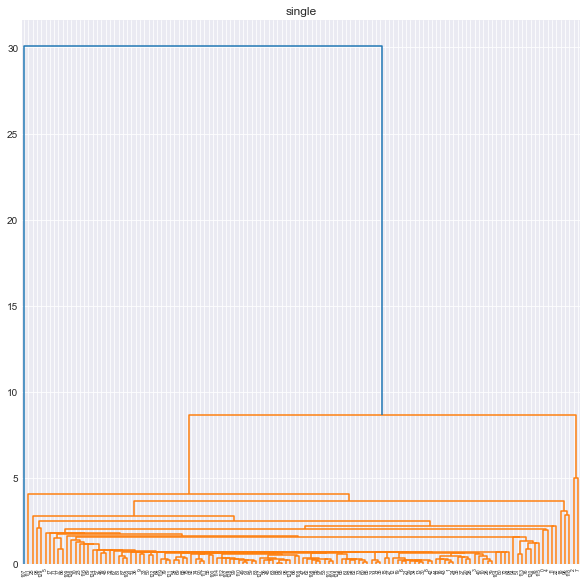

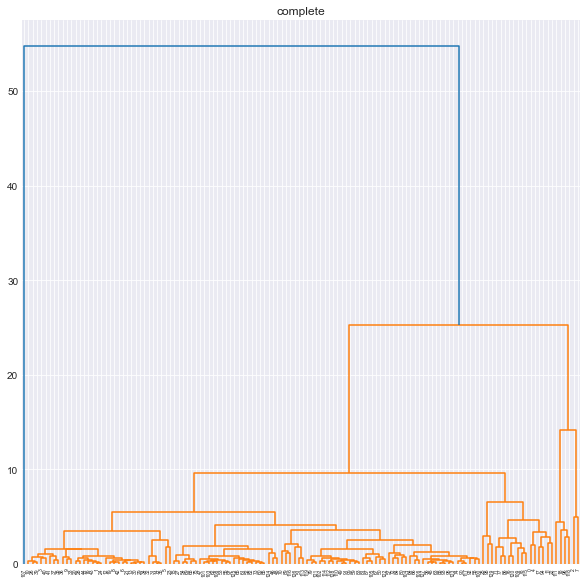

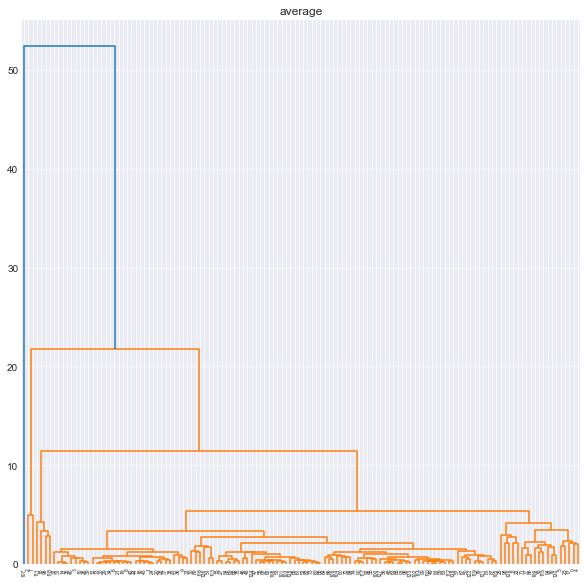

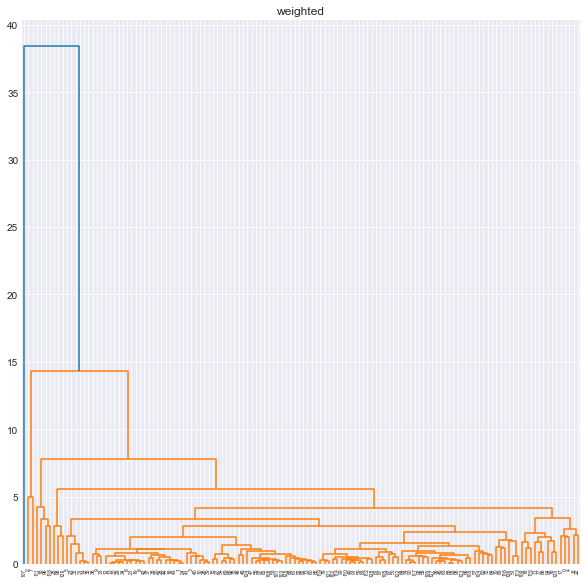

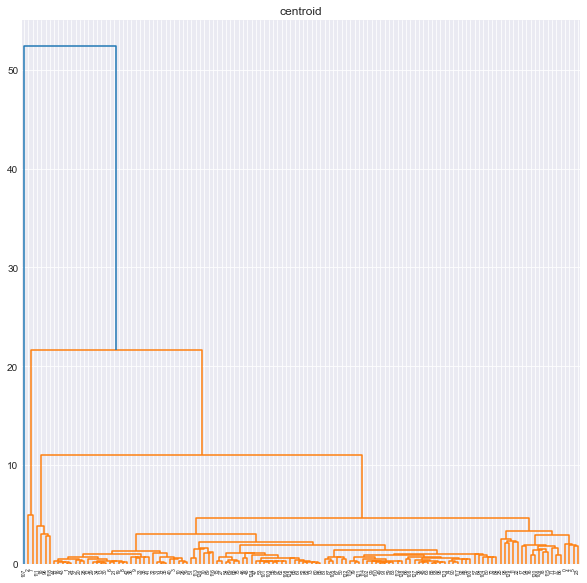

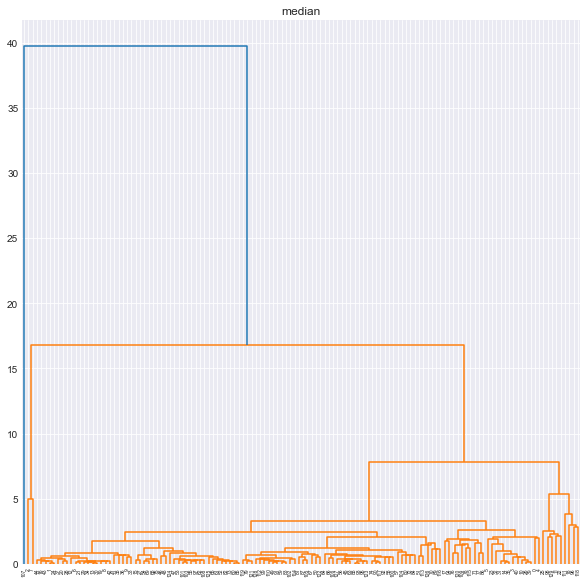

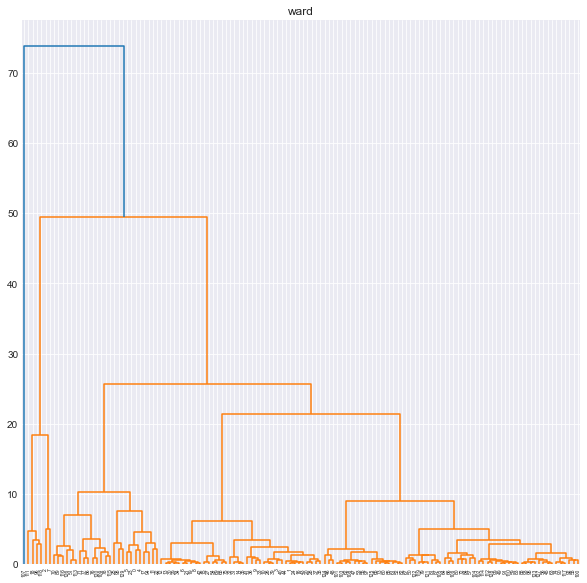

In [47]:
link=["single", "complete", "average", "weighted", "centroid", "median", "ward"]
for l in link:
    Z = hierarchy.linkage(dist_matrix, l)
    pylab.figure(figsize=(10, 10))
    pylab.title(l)
    dendro = hierarchy.dendrogram(Z)

**DBSCAN**

In [48]:
from sklearn.cluster import DBSCAN 

DISTANCIAS

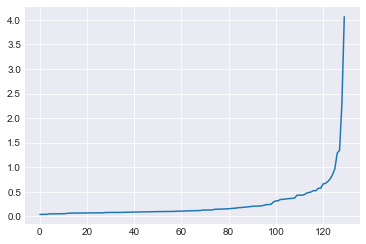

In [49]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors = 2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis = 0)
distances = distances[:, 1]
plt.plot(distances)

In [50]:
epsilon = 0.4
minimumSamples = 7
db = DBSCAN(eps = epsilon, min_samples = minimumSamples).fit(X)
labels = db.labels_
labels

array([-1,  0, -1,  0, -1, -1,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,
       -1, -1,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0, -1,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1])

# OUTLIERS

In [51]:
df.total_interaction.std()

9328.681682872972

In [52]:
df.total_interaction.mean()

4836.461538461538

In [53]:
df.total_interaction.mode()

0    122.0
1    280.0
2    422.0
dtype: float64

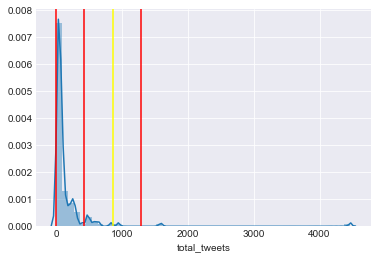

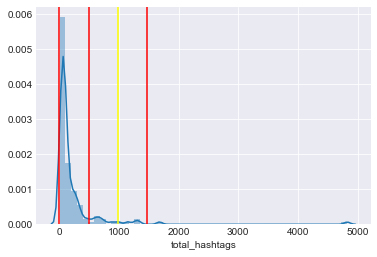

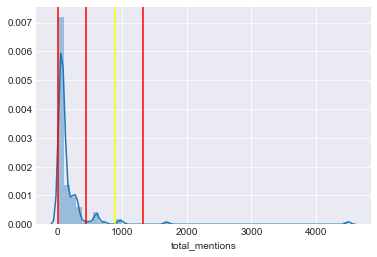

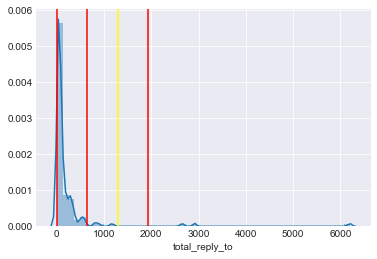

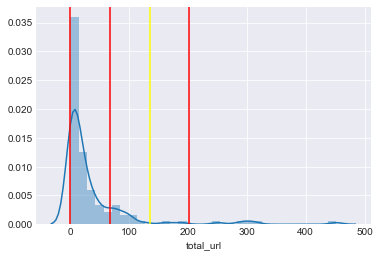

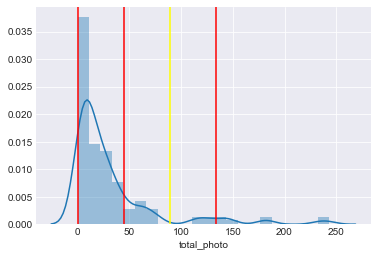

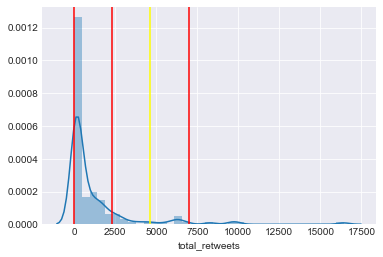

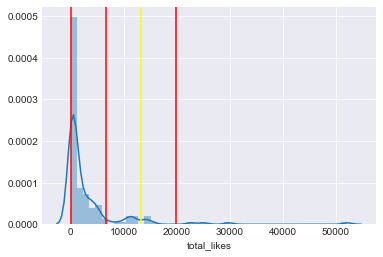

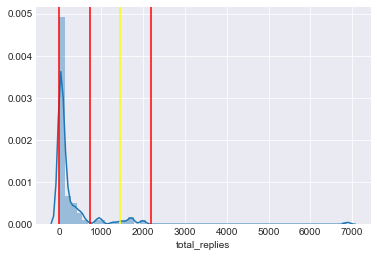

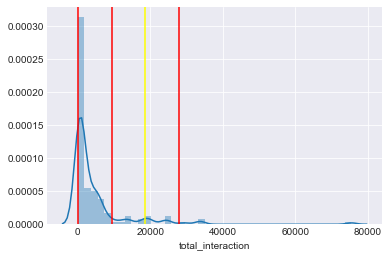

In [54]:
for col in df.columns[2:12]:
    plt.subplots()
    sns.distplot(df[col])
    plt.axvline(0              , 0, 1, color = "red")
    plt.axvline(df[col].std()  , 0, 1, color = "red")
    plt.axvline(df[col].std()*2, 0, 1, color = "yellow")
    plt.axvline(df[col].std()*3, 0, 1, color = "red")
    plt.show()

A partir de la segunda desviación, se consideran outliers

In [55]:
df[df.total_tweets > df.total_tweets.std()*2]

,trend,start_lifetime,total_tweets,total_hashtags,total_mentions,total_reply_to,total_url,total_photo,total_retweets,total_likes,...,tweet_acc_45,tweet_acc_56,tweet_acc_67,user_count_01,user_count_12,user_count_23,user_count_34,user_count_45,user_count_56,user_count_67
2,#CafeConGoles,10,1588,1682,1687,2918,76,124,2152.0,8423.0,...,30,-153,24,1,324,572,522,510,385,247
7,#FelizMartes,6,948,1333,991,1172,452,180,5569.0,11807.0,...,-16,26,82,204,400,351,283,198,140,158
107,La PAH,14,4466,4825,4502,6199,314,243,16416.0,52158.0,...,-88,100,-219,335,711,915,1085,1216,1411,1394


In [56]:
#mucha interacción
df[df.total_interaction > df.total_interaction.std()*2]

,trend,start_lifetime,total_tweets,total_hashtags,total_mentions,total_reply_to,total_url,total_photo,total_retweets,total_likes,...,tweet_acc_45,tweet_acc_56,tweet_acc_67,user_count_01,user_count_12,user_count_23,user_count_34,user_count_45,user_count_56,user_count_67
11,#LosDesayunos,9,253,276,270,260,162,26,9565.0,14096.0,...,0,14,224,1,2,2,1,0,13,232
17,#Sicur2020,10,115,123,120,136,99,2,8279.0,14032.0,...,16,34,-28,5,6,2,2,18,66,88
18,#TechSpiritBarcelona,10,604,677,622,878,61,63,3735.0,29805.0,...,28,34,8,130,262,219,156,123,121,127
76,#reskilling,18,65,79,68,66,0,17,6822.0,15484.0,...,2,8,35,0,1,2,2,3,7,27
94,El Consejo de Ministros,15,235,248,246,242,189,14,6176.0,12040.0,...,-8,-1,10,39,76,63,68,65,57,60
96,el holocausto,18,653,759,722,806,301,77,9905.0,22658.0,...,-6,130,-60,17,50,85,112,134,285,376
107,La PAH,14,4466,4825,4502,6199,314,243,16416.0,52158.0,...,-88,100,-219,335,711,915,1085,1216,1411,1394
118,Red Dead Redemption,15,567,885,573,579,5,233,4741.0,13979.0,...,0,31,505,0,0,0,0,0,30,452
120,San Paolo,19,275,306,317,385,66,24,6314.0,11704.0,...,-9,-1,-12,14,38,57,76,89,98,92
129,Zubeldía,15,485,691,590,499,83,184,3230.0,25095.0,...,20,33,35,40,84,87,85,101,142,215


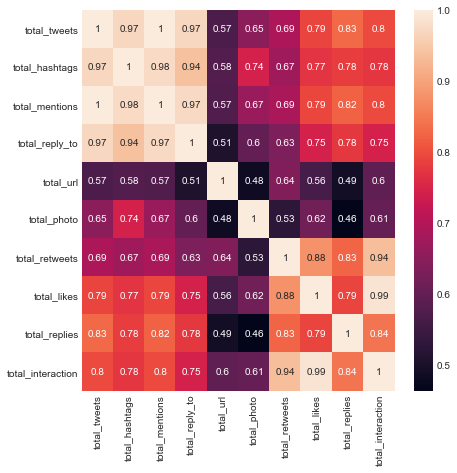

In [57]:
plt.subplots(figsize = (7, 7))
sns.heatmap(df.iloc[:, 2:12].corr(), annot = True)

In [58]:
#Pocos tweets y mucha interacción
df[(df.total_tweets < df.total_tweets.std()) & (df.total_interaction > df.total_interaction.std()*2)]

,trend,start_lifetime,total_tweets,total_hashtags,total_mentions,total_reply_to,total_url,total_photo,total_retweets,total_likes,...,tweet_acc_45,tweet_acc_56,tweet_acc_67,user_count_01,user_count_12,user_count_23,user_count_34,user_count_45,user_count_56,user_count_67
11,#LosDesayunos,9,253,276,270,260,162,26,9565.0,14096.0,...,0,14,224,1,2,2,1,0,13,232
17,#Sicur2020,10,115,123,120,136,99,2,8279.0,14032.0,...,16,34,-28,5,6,2,2,18,66,88
76,#reskilling,18,65,79,68,66,0,17,6822.0,15484.0,...,2,8,35,0,1,2,2,3,7,27
94,El Consejo de Ministros,15,235,248,246,242,189,14,6176.0,12040.0,...,-8,-1,10,39,76,63,68,65,57,60
120,San Paolo,19,275,306,317,385,66,24,6314.0,11704.0,...,-9,-1,-12,14,38,57,76,89,98,92


In [59]:
#Muchos tweets y poca interacción
df[(df.total_tweets > df.total_tweets.std()*2) & (df.total_interaction < df.total_interaction.std())]

,trend,start_lifetime,total_tweets,total_hashtags,total_mentions,total_reply_to,total_url,total_photo,total_retweets,total_likes,...,tweet_acc_45,tweet_acc_56,tweet_acc_67,user_count_01,user_count_12,user_count_23,user_count_34,user_count_45,user_count_56,user_count_67


In [60]:
#muchos tweets y mucha interacción
df[(df.total_tweets > df.total_tweets.std()*2) & (df.total_interaction > df.total_interaction.std()*2)]

,trend,start_lifetime,total_tweets,total_hashtags,total_mentions,total_reply_to,total_url,total_photo,total_retweets,total_likes,...,tweet_acc_45,tweet_acc_56,tweet_acc_67,user_count_01,user_count_12,user_count_23,user_count_34,user_count_45,user_count_56,user_count_67
107,La PAH,14,4466,4825,4502,6199,314,243,16416.0,52158.0,...,-88,100,-219,335,711,915,1085,1216,1411,1394


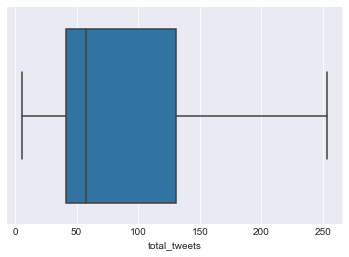

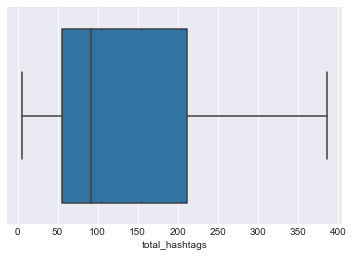

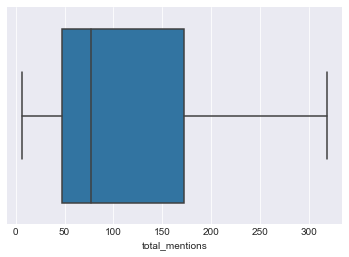

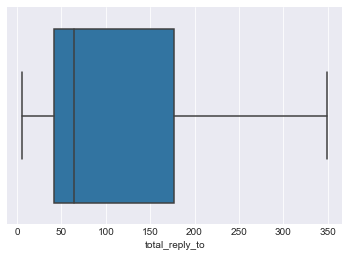

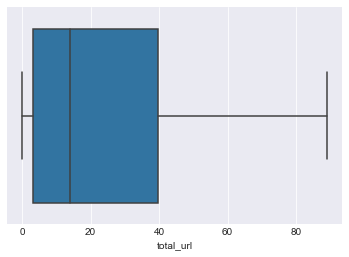

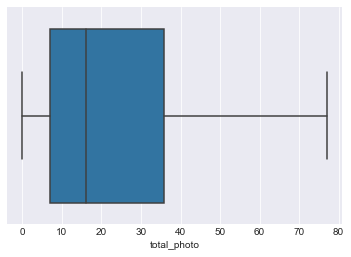

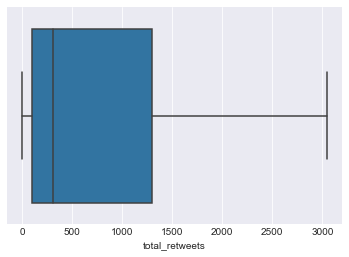

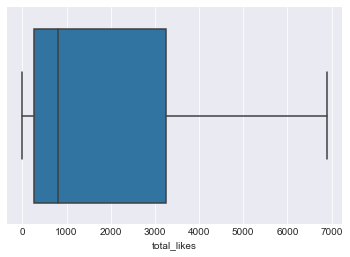

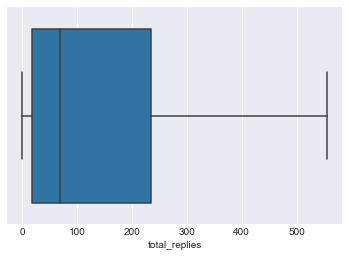

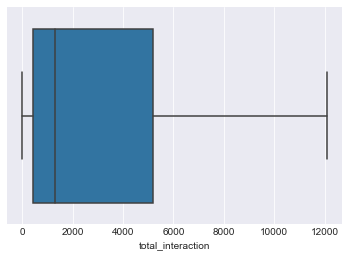

In [61]:
for col in df.columns[2:12]:
    plt.subplots()
    sns.boxplot(df[col], showfliers = False)

In [62]:
Q1 = df['total_interaction'].quantile(0.25)
Q3 = df['total_interaction'].quantile(0.75)
IQR = Q3 - Q1    #IQR rango intercuartil

In [63]:
df_nt=df.iloc[:,2:12]
df_nt.columns

Index(['total_tweets', 'total_hashtags', 'total_mentions', 'total_reply_to',
       'total_url', 'total_photo', 'total_retweets', 'total_likes',
       'total_replies', 'total_interaction'],
      dtype='object')

In [64]:
filter = (df['total_interaction'] >= Q1) & (df['total_interaction'] <= Q3 + 2.5 *IQR)
df_normal=df.loc[filter]

In [65]:
df_normal

,trend,start_lifetime,total_tweets,total_hashtags,total_mentions,total_reply_to,total_url,total_photo,total_retweets,total_likes,...,tweet_acc_45,tweet_acc_56,tweet_acc_67,user_count_01,user_count_12,user_count_23,user_count_34,user_count_45,user_count_56,user_count_67
0,#AndaLevantaM25,7,247,1151,279,309,63,140,1050.0,3877.0,...,-26,62,52,13,20,36,44,25,44,122
2,#CafeConGoles,10,1588,1682,1687,2918,76,124,2152.0,8423.0,...,30,-153,24,1,324,572,522,510,385,247
3,#ComparteTuAmanecer,8,101,265,171,209,2,32,444.0,616.0,...,7,6,61,0,0,0,0,7,16,33
4,#Coronavirius,10,165,279,180,183,6,113,449.0,2004.0,...,72,-108,-79,4,10,10,13,37,32,11
5,#DragonQuestoftheStars,10,239,366,266,349,98,41,508.0,1261.0,...,7,8,60,56,87,54,39,31,31,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Tirpa,16,23,28,28,23,16,6,208.0,812.0,...,0,0,23,0,0,0,0,0,0,22
124,Valencia y Castellón,14,55,55,57,56,4,7,1108.0,6308.0,...,-13,-32,9,0,0,0,26,40,23,14
126,Violetta,15,130,181,130,130,0,27,301.0,2057.0,...,1,103,-80,0,1,2,1,1,94,114
127,World Press Photo 2020,16,51,57,52,55,35,5,553.0,813.0,...,1,28,-6,0,1,1,0,0,28,49


In [66]:
df_normal=df_normal.reset_index(drop=True)

In [67]:
df_normal.to_csv('Q1Q3_tweets_25_tendencias_variables.csv', sep=';')

In [68]:
filter2 = (df['total_interaction'] <= Q3 + 2.5 *IQR)
df_up=df.loc[filter2]

In [69]:
df_up=df_up.reset_index(drop=True)

In [70]:
df_up.to_csv('Q3_tweets_25_tendencias_variables.csv', sep=';')

In [71]:
df_up.total_tweets.mean()

110.34745762711864

In [72]:
df.total_tweets.mean()

168.24615384615385

In [73]:
df.total_interaction.mean()

4836.461538461538

In [74]:
df_up.total_interaction.mean()

2443.7118644067796

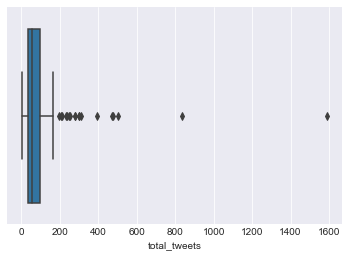

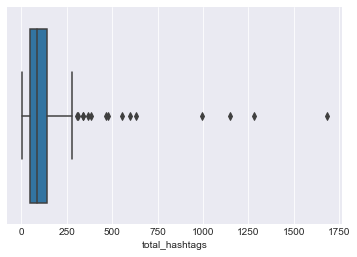

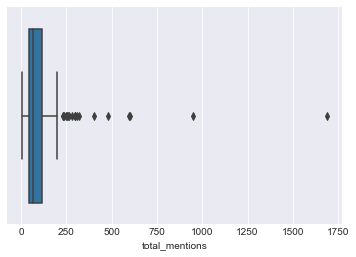

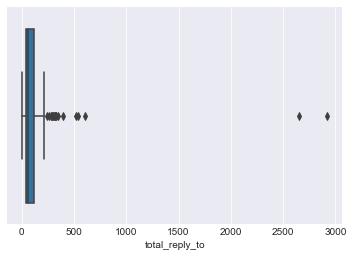

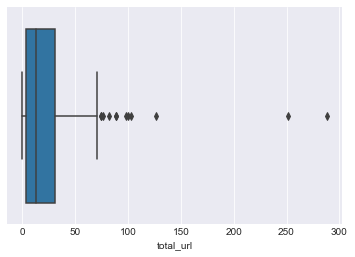

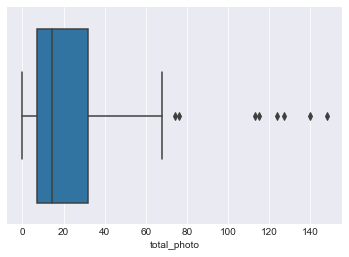

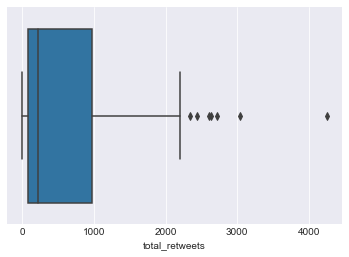

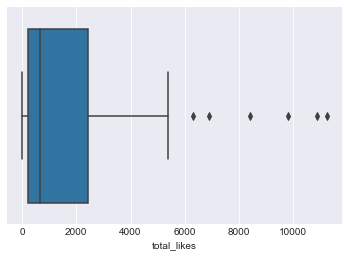

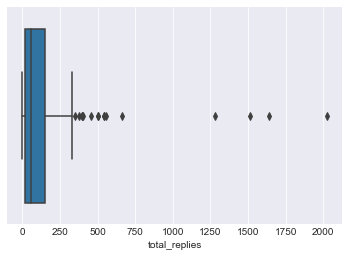

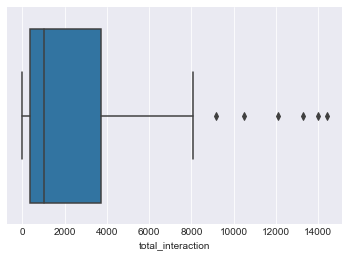

In [75]:
for col in df_up.columns[2:12]:
    plt.subplots()
    sns.boxplot(df_up[col], showfliers = True)

In [160]:
df.loc[0]

trend                #SuperligaOrangeLoL12
start_lifetime                          21
total_tweets                             9
total_hashtags                          28
total_mentions                          10
total_reply_to                          10
total_url                                0
total_photo                              5
total_retweets                          12
total_likes                             32
total_replies                            2
total_interaction                       46
tweet_count_01                           0
tweet_count_12                           4
tweet_count_23                           7
tweet_count_34                           3
tweet_count_45                           1
tweet_count_56                           1
tweet_count_67                           1
tweet_vel_01                             0
tweet_vel_12                             4
tweet_vel_23                             3
tweet_vel_34                            -4
tweet_vel_4

In [164]:
df_normal

,total_tweets,total_hashtags,total_mentions,total_reply_to,total_url,total_photo,total_retweets,total_likes,total_replies,total_interaction
0,416,433,418,488,64,27,566.0,1763.0,231.0,2560.0
1,679,822,701,883,64,80,595.0,2758.0,220.0,3573.0
2,827,875,858,1473,42,68,2308.0,7412.0,443.0,10163.0
3,62,132,71,70,1,5,630.0,3584.0,162.0,4376.0
4,200,265,215,220,25,34,94.0,1152.0,84.0,1330.0
...,...,...,...,...,...,...,...,...,...,...
111,130,134,134,148,11,16,88.0,447.0,46.0,581.0
112,262,277,262,264,6,23,1182.0,10416.0,250.0,11848.0
113,399,435,402,399,19,111,142.0,1341.0,157.0,1640.0
114,114,121,118,174,6,15,97.0,587.0,58.0,742.0
